# Classification of Names According to the Countries
# Required Steps
### Step 1: Helper functions to convert the sequence of a name into characters
### Step 2: Provide converted characters of the sequence to RNN
### -----------------------------------------------------------------------

# Implementation of Step 1

In [172]:
import io
import os
import unicodedata
import string
import glob

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [173]:
# get ascii characters i.e. capital alphabets, small alphabets, and special characters (.,;)
characters = string.ascii_letters + " .,;'"
print(characters)
num_characters = len(characters)
print(num_characters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
57


# Helper Function 1: For Converting Diacritics Into Plain Ascii
### Remove all the accents/unicodes (diacritics) from the string and convert it into a plain ascii
### Example 'kožušček' -> 'kozuscek'

In [174]:
def diacritics_to_ascii(word):
    return ''.join(l for l in unicodedata.normalize('NFD', word)
                  if unicodedata.category(l) != 'Mn')

In [175]:
print(diacritics_to_ascii('kožušček'))

kozuscek


# Helper Function 2: For Loading Data
### Return Names and Nationalities

In [176]:
def load_names_data():
    nationalities_and_names = {}
    nationalities = []
    
    # get paths of text files
    text_file_paths = glob.glob('./data/names_classification_data/names/*')
    
    # load data from each text file and save into dictionary
    for file_path in text_file_paths:
        # get name of the nationalities/files
        nationalities.append(os.path.splitext(os.path.basename(file_path))[0])
        
        # dictionary of nationalities along with the corresponding names of national people
        lines = io.open(file_path, encoding='utf-8').read().strip().split('\n')
        nationalities_and_names[nationalities[-1]] = [diacritics_to_ascii(line) for line in lines]
    return nationalities_and_names, nationalities

In [177]:
nationalities_and_names, nationalities = load_names_data()
print(nationalities_and_names['French'])
print(nationalities)

['Abel', 'Abraham', 'Adam', 'Albert', 'Allard', 'Archambault', 'Armistead', 'Arthur', 'Augustin', 'Babineaux', 'Baudin', 'Beauchene', 'Beaulieu', 'Beaumont', 'Belanger', 'Bellamy', 'Bellerose', 'Belrose', 'Berger', 'Beringer', 'Bernard', 'Bertrand', 'Bisset', 'Bissette', 'Blaise', 'Blanc', 'Blanchet', 'Blanchett', 'Bonfils', 'Bonheur', 'Bonhomme', 'Bonnaire', 'Bonnay', 'Bonner', 'Bonnet', 'Borde', 'Bordelon', 'Bouchard', 'Boucher', 'Brisbois', 'Brodeur', 'Bureau', 'Caron', 'Cavey', 'Chaput', 'Charbonneau', 'Charpentier', 'Charron', 'Chastain', 'Chevalier', 'Chevrolet', 'Cloutier', 'Colbert', 'Comtois', 'Cornett', 'Cote', 'Coupe', 'Courtemanche', 'Cousineau', 'Couture', 'Daniau', "D'aramitz", 'Daviau', 'David', 'Deforest', 'Degarmo', 'Delacroix', 'De la fontaine', 'Deniau', 'Deniaud', 'Deniel', 'Denis', 'De sauveterre', 'Deschamps', 'Descoteaux', 'Desjardins', 'Desrochers', 'Desrosiers', 'Dubois', 'Duchamps', 'Dufort', 'Dufour', 'Duguay', 'Dupond', 'Dupont', 'Durand', 'Durant', 'Duval',

# Helper Functions For One-Hot-Encoding of Characters
### size = 1 x n (Characters)
### Characters are joined into a 2D matrix (word_length x 1 x n_characters) to make a word
### Extra 1 dimension is because of providing batches (Conventional assumption of batches in Pytorch). Here batch size = 1

In [178]:
# convert a character into 1 x n_characters tensor
def char_to_tensor(c):
    tensor = torch.zeros(1, num_characters)
    tensor[0][characters.find(c)] = 1 # find character index and convert that index of tensor into 1
    return tensor # one-hot-encoded vector for the character

In [179]:
print(char_to_tensor('W'))
print(char_to_tensor('W').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([1, 57])


In [180]:
# Convert a word into (word_length x 1 x n_characters)
def word_to_tensor(w):
    tensor = torch.zeros(len(w), 1, num_characters)
    for i, c in enumerate(w):
        tensor[i][0][characters.find(c)] = 1
    return tensor # one-hot-encoded matrix for the word

In [181]:
print(word_to_tensor('Alex'))
print(word_to_tensor('Alex').size())

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

# Helper Function for Picking-up
### 1. Random Nationality
### 2. Random Name From Randomly Chosen Nationality
### 3. Tensor Index of the Randomly Chosen Nationality
### 4. One-Hot-Encoded Matrix of the Randomly Chosen Name

In [182]:
def pick_random_name(nationalities_and_names, nationalities):
    # randomly pick a nationality
    idx = random.randint(0, len(nationalities) - 1)
    national = nationalities[idx]
    
    # randomly pick name from randomly chosen nationality
    idx = random.randint(0, len(nationalities_and_names[national]) - 1)
    name = nationalities_and_names[national][idx]
    
    # pick tenso index number of the nationality from the <nationalities_and_names> dictionary
    nationality_tensor = torch.tensor([nationalities.index(national)], dtype=torch.long)
    name_tensor = word_to_tensor(name) # one-hot-encoded matrix of the rnadomly chosen name
    return national, name, nationality_tensor, name_tensor

In [183]:
national, name, nationality_tensor, name_tensor = pick_random_name(nationalities_and_names, nationalities)
print(national)
print(name)
print(nationality_tensor)
print(name_tensor)

Russian
Pahtel
tensor([14])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

# Step 2: Implementation of RNN
# -------------------------------------------

# Define the Layers of RNN Model
### Input Linear Layer
### Hidden Linear Layer
### Softmax Function for Multiple Classes

In [184]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.in_to_hid = nn.Linear(input_size + hidden_size, hidden_size)
        self.in_to_out = nn.Linear(input_size + hidden_size, output_size)
        self.sm = nn.LogSoftmax(dim=1) # 1 x 57
        
    def forward(self, input_tensor, hidden_tensor):
        merged_tensor = torch.cat((input_tensor, hidden_tensor), 1)
        
        hid = self.in_to_hid(merged_tensor)
        out = self.in_to_out(merged_tensor)
        out = self.sm(out)
        
        return hid, out
    
    # helper function for initial hidden state in the beginning
    def init_hid(self):
        return torch.zeros(1, self.hidden_size)

In [185]:
# load data
nationalities_and_names, nationalities = load_names_data()
num_nationalities = len(nationalities)
print(num_nationalities)

18


### Load RNN model

In [186]:
num_hid = 128
model = RNN(num_characters, num_hid, num_nationalities)

### Test model on a single character/step

In [187]:
in_tensor = char_to_tensor('T')
hid_tensor = model.init_hid()

next_hid, out = model(in_tensor, hid_tensor)
print(out.size())
print(next_hid.size())

torch.Size([1, 18])
torch.Size([1, 128])


### Test model on a complete name/word

In [188]:
in_tensor = word_to_tensor('PyTorch')
hid_tensor = model.init_hid()

next_hid, out = model(in_tensor[0], hid_tensor)
print(out.size())
print(next_hid.size())

torch.Size([1, 18])
torch.Size([1, 128])


# Helper Function to Extract Nationality
## Get the tensor index that has highest probability value by:
### - Providing a name as input
### - Getting correponding nationality based on probabilty as output

In [189]:
def detect_nationality(out):
    return nationalities[torch.argmax(out).item()]

In [190]:
# Dummy example testing without training the model
print(detect_nationality(out))

Polish


In [191]:
# set criterion and optimizer
criterion = nn.NLLLoss() # negative likelihood loss
learning_rate = 0.003
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Model Training

In [192]:
def rnn_training(name_tensor, nationality_tensor):
    hidden = model.init_hid()
    
    for i in range(name_tensor.size()[0]):
        hid, out = model(name_tensor[i], hidden)
        
    loss = criterion(out, nationality_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return out, loss.item()

# Implement Typical Training Loop

In [193]:
# tracking current loss and all the losses
ongoing_loss = 0
losses = []

plt_steps, print_steps = 1000, 5000
iters = 100000

for i in range(iters):
    national, name, nationality_tensor, name_tensor = pick_random_name(nationalities_and_names, nationalities)
    
    output, loss = rnn_training(name_tensor, nationality_tensor)
    ongoing_loss += loss
    
    # append loss at every plt_step
    if (i+1) % plt_steps == 0:
        losses.append(ongoing_loss / plt_steps)
        ongoing_loss = 0
        
    if (i+1) % print_steps == 0:
        predict = detect_nationality(output)
        is_correct = "CORRECT" if predict == national else f"WRONG ({national})"
        print(f"{i+1} {(i+1)/iters*100} {loss:.4f} {name} / {predict} {is_correct}")

5000 5.0 2.7922 Maria / Japanese WRONG (Portuguese)
10000 10.0 2.7883 Handal / Czech WRONG (Arabic)
15000 15.0 1.6331 Lolos / Greek CORRECT
20000 20.0 1.5170 Garofalis / Greek CORRECT
25000 25.0 2.8310 Baik / Polish WRONG (Korean)
30000 30.0 2.3401 Fierro / Portuguese WRONG (Spanish)
35000 35.0 2.6634 Fiskin / Irish WRONG (Russian)
40000 40.0 2.6293 Schuyler / German WRONG (Dutch)
45000 45.0 3.1570 Giles / Greek WRONG (French)
50000 50.0 2.4620 Gerhardt / French WRONG (German)
55000 55.00000000000001 3.0575 Guirguis / Greek WRONG (Arabic)
60000 60.0 2.1303 Soares / Greek WRONG (Portuguese)
65000 65.0 3.7349 Klimes / Greek WRONG (Czech)
70000 70.0 0.4896 Isachenkov / Russian CORRECT
75000 75.0 2.1318 Vykruta / Japanese WRONG (Czech)
80000 80.0 3.0538 Sandoval / Czech WRONG (Spanish)
85000 85.0 3.1779 Desrosiers / Greek WRONG (French)
90000 90.0 3.4571 Uerling / Chinese WRONG (Czech)
95000 95.0 0.9841 Sortras / Greek CORRECT
100000 100.0 1.4479 Yasukawa / Japanese CORRECT


# Plot Loss Graph

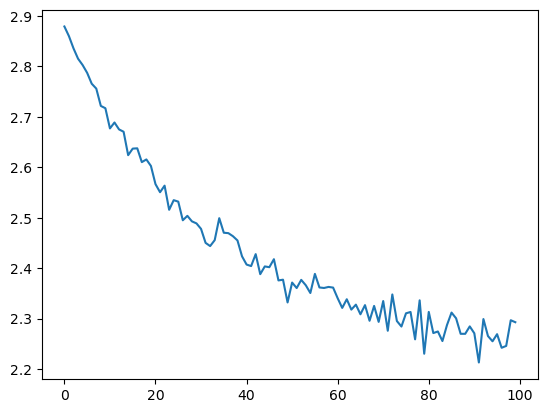

In [194]:
plt.figure()
plt.plot(losses)
plt.show()

### Testing Examples After Training Model

In [201]:
def predict_name(name):
    print(f"The input name = {name}")
    with torch.no_grad():
        name_tensor = word_to_tensor(name)
        
        hidden = model.init_hid()
    
        for i in range(name_tensor.size()[0]):
            hidden, output = model(name_tensor[i], hidden)
        
        pred = detect_nationality(output)
        print(f"The predicted nationality = {pred}")

In [203]:
predict_name('Akita') # Japanese

The input name = Akita
The predicted nationality = Japanese
